# Chapter 2: Python Programming for Physicists 

Hello readers, I thought it would be fun to do these exercises are from Mark Newman's "Computational Physics" book.

Exercises are done by me, Ken Luu.

**Exercise 2.2: Altitude of a Satellite** 

A satellite is to be launched into a circular orbit around the Earth so that it orbits the planet every T seconds.
The height of the satellite is given by the expression 
\begin{align}
h = \left(\frac{GMT^{2}}{4\pi^{2}} \right)^{1/2} - R
\end{align}

where *G* is the gravitational constant, *T* is the period, *M* is the Earth's mass, and *R* is the Earth's radius. If you do not know where this expression comes from, start with this:

\begin{align}
G\frac{Mm}{r^{2}} = \frac{mv^{2}}{r}
\end{align}

and recall 

\begin{align}
v = \omega r.
\end{align}

and $h = r - R_{E}$. Then with some algebra, you get the expression of the height of the satellite.

Our task is to enter in a desired value of *T* and to study the altitude.

In [17]:
import numpy as np

G = 6.67e-11 #m^3*kg^-1*s^-2
M = 5.97e24 #kg
R = 6371 #km

pi = np.pi

R = R *1000 #meters

Tday = 24*60*60 #1 day
TdayGeo = 23.93*60*60 # geosychronous orbit is 23.93 day
T90min = 90*60
T45min = 45*60

holdHeights = []

periods = [Tday,TdayGeo,T90min,T45min]

for T in periods:
    h = ( (G*M*(T**2))/(4*pi**2) )**(1/3) - R
    
    holdHeights.append(h)

    print(f"For a period of {T} seconds ({T/60} minutes), the alitude is {round(h/1000,4)} km.")

print('')
print("The difference between 24 hr and 24.93 hr is:", round((holdHeights[0]-holdHeights[1])/1000,3), "km")



For a period of 86400 seconds (1440.0 minutes), the alitude is 35855.9102 km.
For a period of 86148.0 seconds (1435.8 minutes), the alitude is 35773.7623 km.
For a period of 5400 seconds (90.0 minutes), the alitude is 279.3216 km.
For a period of 2700 seconds (45.0 minutes), the alitude is -2181.5599 km.

The difference between 24 hr and 24.93 hr is: 82.148 km


We see that an orbit of 45 minutes cannot happen. 

A geosynchronous orbit (a high Earth Orbit) is one that orbits the Earth once per sidereal day, which is roughly 24.93 hours. A sidereal day is the time it takes for the Earth to rotate about its axis so that the distant stars appear in the same position in the sky. A solar day is the time it takes for the Earth to rotate about its axis so that the Sun appears in the same position in the sky. The sidereal day is about 4 minutes shorter than the solar day (see source for more info: [link](https://astronomy.swin.edu.au/cosmos/s/Sidereal+Day)). Also, read [geosynchronous](https://www.space.com/29222-geosynchronous-orbit.html) for more details on geosynchronous orbits.

**Exercise 2.4: Special Relativity**

A spaceship travels from Earth is a straight line at a relativistic speed $v$ to another planet $x$ light years away. Write a program to ask the user for the value of $x$ and the speed $v$ as a fraction of the speed of light $c$, then print out the time in years that the spaceship takes to reach its desination (a) in the rest frame of an observer on Earth and (b) as perceived by a passenger on board the ship. 

Okay, things are getting special, get it? I will not dive in the details of the special theory of relatity and will simply write out the needed equations

\begin{align}
\gamma = \frac{1}{\sqrt{1-v^{2}/c^{2}}}
\end{align}

*Moving clocks run slow*

\begin{align}
t_0 = \frac{t}{\gamma} 
\end{align}

In [12]:
import numpy as np


v = 0.99 # This is insanely fast
x = 10 

t = x/v

y = 1.0/np.sqrt(1-(v**2))

t0 = np.sqrt(1-(v**2))*t
print(f"The time elapsed from the observer on earth: {round(t,3)} years")
print(" ")
print(f"The time elapsed from the observer on the spaceship is: {round(t0,3)} years")
print(" ")
print(f"Gamma factor is: {round(y,3)}")


The time elapsed from the observer on earth: 10.101 years
 
The time elapsed from the observer on the spaceship is: 1.425 years
 
Gamma factor is: 7.089


**Exercise 2.6: Planetary Orbits**

The orbit in space of one body around another are often not circular. In general, it takes the form of an ellipse, with the body sometimes closer in and sometimes further out. Given a distance $l_{1}$ of closest approach that a planet makes to the Sun (known as the $perihelion$, and its linear velocity $v_{1}$ at perihelion, then any other property of the orbit can be calculated from these two.

a) Kepler's second law says that the distance $l_2$ and velocity $v_2$ of the planet at its most distance point ($aphelion$), satisfies the relation $l_{2}v_{2} = l_{1}v_{1}$. At the same time the total energy of a planet with velocity $v$ and distance $r$ from the Sun is given by 

\begin{align}
E = \frac{1}{2}mv^2 - G\frac{Mm}{r}
\end{align} 

$m$ is planet's mass, $M = 1.9891x10^{30}$ kg is the mass of the Sun, $G = 6.67 x 10^{-11} m^{3}kg^{-1}s^{-2}$. 

Given that 
\begin{align}
v_{2}^{2} - \frac{2GM}{v_{1}l_{1}}v_{2} - \left[v_{1}^{2} - \frac{2GM}{l_{1}} \right] = 0,
\end{align}

show that $v_2$ is the smaller root of the quadratic equation. Once we have $v_2$ we can calculate other quanitities. 


b) Given $v_{1}, l_{1}, \ \rm{and} \ l_{2}$ we can get the quantities: 

\begin{align}
\begin{split}
a &= \frac{1}{2}(l_{1}+l_{2})
\\
b &= \sqrt{l_{1}l_{2}}
\\
T &= \frac{2\pi ab}{l_{1}v_{1}}
\\
\epsilon &= \frac{l_{2}-l_{1}}{l_{2}+l_{1}}
\end{split}
\end{align}

c) Test the program by calculating properties of the Earth ($l_{1} = 1.4710 x 10^{11}$ m and $v_{1} = 3.0287 x 10^{4}$ m/s) and Halley's comet ($l_{1} = 8.7830 x 10^{10}$ m and $v_{1} = 5.4529 x 10^{4}$ m/s).

Part (a) is straight-forward. Doing the algebra, one should arrive at: 

\begin{align}
v_{2} = \frac{GM}{v_{1}l_{1}} \pm \left[\left(\frac{GM}{v_{1}l_{1}}\right)^{2} + \left(v_{1}^{2}-\frac{2GM}{l_{1}}\right) \right]^{1/2}
\end{align}

Sweet! Now we can use this to do calculations.

In [104]:
import numpy as np

v1 = np.array([3.0287e4,5.4529e4])
l1 = np.array([1.4710e11,8.7830e10])

pi = np.pi
G = 6.6738e-11
M = 1.9891e30


k1 = (G*M)/(v1*l1)
k2 = (v1**2 - (2*G*M)/(l1))
root = np.sqrt(k1**2 + k2)


v2 = np.array([min(k1+root),min(k1-root)])
l2 = (v1*l1)/v2

sectoyr = 365*24*60*60

a = 0.5*(l1+l2)
b = np.sqrt(l1*l2)
T = (2*pi*a*b)/(l1*v1)
ecc = (l2-l1)/(l2+l1)


objects = ['Earth','Halley']

for i in range(len(v1)):

    print(f"The orbital period of {objects[i]} is: {round(T[i]/sectoyr,4)} year")
    print(f"The eccentricity of {objects[i]} is: {(ecc[i])}")
    

The orbital period of Earth is: 0.9677 year
The eccentricity of Earth is: -6.223843261386815e-16
The orbital period of Halley is: 76.0817 year
The eccentricity of Halley is: 0.9672889126454061


A quick discussion, why is there a "min" function in the v2 array? This is because we want to satisfy

\begin{align}
v_{1}l_{1} = v_{2}l_{2}.
\end{align}

If we did not add the min function we get something show below

In [103]:
v2 = np.array([min(k1+root),min(k1-root)])
l2 = (v1*l1)/v2

v2notmin = np.array([(k1+root),(k1-root)])
print("v2 without min function",v2notmin)

print("")
peri = v1*l1
print("The perihelion relation is:",peri)
print("")
aph = v2notmin*l2
print("The aphelion relation is:",aph)



v2 without min function [[30287.         54529.        ]
 [29305.39917726   906.68069692]]

The perihelion relation is: [4.45521770e+15 4.78928207e+15]

The aphelion relation is: [[4.45521770e+15 2.88033883e+17]
 [4.31082422e+15 4.78928207e+15]]


You see that the values in the aphelion relation, $v_{2}l_{2}$, is only equal to the perihelion relation, $v_{1}l_{1}$, when the values of $v_{2}$ are the minimum of that set. Only then do we satisfy energy conservation.

**Exerise 2.7: Catalan numbers**

The Catalan numbers $C_{n}$ are a sequence of integers: 1, 1, 2, 5, 14, 42, 132... They are given by

\begin{align}
C_{0} = 1,\ C_{n+1} = \frac{4n+2}{n+2}C_{n}
\end{align}

Write a program that prints in increasing order of all Catalan numbers less than or equal to one billion. Then I plotted the growth of the numbers.

In [1]:
import numpy as np
import matplotlib.pyplot as plt


def coordinates(num):
    
    x = num*np.cos(num)
    y = num*np.sin(num)
    
    return (x,y)

c0 = 1
n = 0
c = 1

chold = []
nhold = []

print(c0)


while c <= 1e23:
    c = int( (4*n+2)/(n+2)*c) 
    print(c)
    n = n+1
    


1
1
2
5
14
42
132
429
1430
4862
16796
58786
208012
742900
2674440
9694845
35357670
129644790
477638700
1767263190
6564120420
24466267020
91482563640
343059613650
1289904147324
4861946401452
18367353072152
69533550916004
263747951750360
1002242216651368
3814986502092304
14544636039226908
55534064877048200
212336130412243136
812944042149730944
3116285494907301888
11959798385860456448
45950804324621754368
176733862787006758912
680425371729976098816
2622127042276493361152
10113918591637903114240
39044429911904466501632
150853479205085437231104


**Exercise 2.9: The Madelung Constant**

In condensed matter, the Madelung constant gives the total electric poential felt by an atom in a solid. It depends on the charges on the other atoms nearby and their locations. Here in this exercise, we are taking into consideration the RAREST of element: sodium chloride. Commonly known as table salt. The sodium chloride crystal has atoms arranged on a cubic lattice, but with alternating sodium and chlorine atoms, the sodium ones having a single positive charge $+e$ and the chlorine ones a single negative charge $-e$. We label each position on the lattice by three integer coordinates ($i, j, k$), the sodium atoms fall at positions where $i + j + k$ is even, and the chlorine atoms at positions where $i + j + k$ is odd.

In this exercise, we consider a sodium atom at the origin, $i = j = k = 0$, and we will calculate the Madelung constant. If the spacing of atoms on the lattice is $a$, then the distance from the origin to the atom at position ($i, j, k$) is 

\begin{align}
\sqrt{ (ia)^{2}+(ja)^{2}+(ka)^{2} } = a \sqrt{i^{2}+j^{2}+k^{2}},
\end{align}

and the potential at the origin created by an atom is

\begin{align}
V(i,j,k) = \pm \frac{e}{4\pi\epsilon_{0}a\sqrt{i^{2}+j^{2}+k^{2}}},
\end{align}

the sign of the expression depending on whether $i + j + k$ is even or odd. The total potential felt by the sodium atom is then the sum of this quantity over all other atoms. We are assuming a cubic box around the sodium at the origin, with $L$ atoms in all directions. Then we get

\begin{align}
V_{\rm{total}} = \sum_{i,j,k = -L}^{L} V(i,j,k) = \frac{e}{4\pi\epsilon_{0}a}M,
\end{align}

where $M$ is the Madelung constant, well approximately the constant. The Madelung constant is the value of $M$ when $L \rightarrow \infty$.

Okay, if we substitute the potential given into the middle of the last equation, we end up getting something like

\begin{align}
M = \sum_{i,j,k = -L}^{L} \frac{(-1)^{i+j+k}}{\sqrt{i^{2}+j^{2}+k^{2}}}
\end{align}


In [51]:
import numpy as np

L = 100
M = 0
for i in range(-L,L+1):
    for j in range(-L,L+1):
        for k in range(-L,L+1):
            if (i==j==k==0):
                continue
                
            M = M + (-1)**(i+j+k)/np.sqrt(i**2 + j**2 + k**2)
                
print("The Madelung constant of table salt is:", abs(round(M,4)))
            

The Madelung constant of table salt is: 1.7418


**Exercise 2.10: The Semi-Empirical Mass Formula**

In nuclear physics, the semi-empirical mass formula is a formula for calculating the approximate nuclear binding energy $B$ of an atomic nucleus with atomic number $Z$ and mass number $A$:

\begin{align}
B = a_{1}A - a_{2}A^{2/3}-a_{3}\frac{Z^{2}}{A^{1/3}}-a_{4}\frac{(A-2Z)^{2}}{A}+\frac{a_{5}}{A^{1/2}},
\end{align}

the coefficients are in units of $MeV$: $a_{1} = 15.8$, $a_{2} = 18.3$, $a_{3} = 0.714$, $a_{4} = 23.2$, and

\begin{align}
a_{5} =  \begin{cases} 
      0 & \rm{if\ A\ is\ odd} \\
      12.0 & \rm{if\ A\ and\ Z\ are\ both\ even} \\
      -12.0 & \rm{if\ A\ is\ even\ and\ Z\ is\ odd}
   \end{cases}
\end{align}

In a later project, we will explore this mass formula again but this time we will actually solve for the coefficients by reading nulcear data from file. Stay tuned.

In [177]:
import numpy as np

a1 = 15.8
a2 = 18.3
a3 = 0.714
a4 = 23.2

def mainProg():
    
    
    A = 58
    Z = 28
    ###############
    a5 = a5coef(A,Z)
    ###############
    
    bindE = BE(A,Z,a5)
    BperA = bindE/A 
    
 
    print(f"The binding energy of an atomic nucleus with mass number A={A} " 
          f"and atomic number Z={Z} is: {round(bindE,5)} MeV")
    
    print(f"The binding energy per nucleon of an atomic nucleus with mass number A={A} " 
          f"and atomic number Z={Z} is: {round(BperA,5)} MeV")
    
    
def a5coef(A,Z):
    if (A%2 != 0):
        return 0
    elif ( (A%2==0) and (Z%2==0) ):
        return 12.0
    elif ( (A%2==0) and (Z%2 !=0) ):
        return -12.0
    
    
def BE(A,Z,a5):
    
    B = a1*A - a2*(A**(2/3)) - a3*(Z**2)/(A**(1/3)) - a4*(A-2*Z)**2/(A) + a5/(A**(1/2))

    return B
    
    
    
if __name__ == '__main__':
    mainProg()

The binding energy of an atomic nucleus with mass number A=58 and atomic number Z=28 is: 497.56202 MeV
The binding energy per nucleon of an atomic nucleus with mass number A=58 and atomic number Z=28 is: 8.57866 MeV


Part (c) asks you to take input of a single value of $Z$, and then go through all values of $A$ from $A = Z$ to $A = 3Z$, to find the one that has the largest binding energy per nucleon. This is the most stable nucleus with the given atomic number. Okay, cool. You can do this two ways using, this will be demonstrated below.

In [204]:
import numpy as np

def stablenuc(Z):

    A = np.arange(Z,3*Z + 1,1)
    a5 = np.empty(len(A))

    for a in A:

        a5 = a5coef(a,Z)

    B = BE(A,Z,a5)

    BperA = (B/A)

    i = np.where(BperA == max(BperA))
    
    return ( A[i],max(BperA),A)

Z = 28

znum = stablenuc(Z)



print(f"The most stable nucleus with atomic number Z = {Z} is A = {str(znum[0])[1:-1]}")

# now we run through the Z's

    #Z = np.arange(1,101,1)

Z = np.arange(1,101,1)      
    
be = np.empty(len(Z))
a = np.empty(len(Z))

k1 = []
k2 = []

for z in Z:   

    val = stable(z)
    a = val[0]
    be = val[1]
    
    k1.append(list(val[0]))
    k2.append(val[1])
        
    



print(f"The max binding energy per nucleon is { round(max(k2),3) } Mev. "
      f"This happens at Z = {Z[k2.index(max(k2))]} ")




The most stable nucleus with atomic number Z = 28 is A = 63
The max binding energy per nucleon is 8.705 Mev. This happens at Z = 28 


I would not have found out about the "max index" method without Sasha Bakker. Thank you for the the insight, and to people looking at this please look at her github! It's awesome.

In [203]:
import numpy as np

def stablenuc(Z):
    A = np.arange(Z,3*Z+1,1)
    a5 = []
    
    for a in A:
        a5.append(a5coef(z,Z))
    B = BE(A,Z,a5)
    BA = list(B/A)
    maxBA = max(BA)
    i = BA.index(max(BA))
    
    return (A[i],maxBA)

Z = 28

Z = np.arange(1,101,1)

e = []
a = []

for z in Z:
    x = stablenuc(z)
    a.append(x[0])
    e.append(x[1])
    
    
print(f"The max binding energy per nucleon is { round(max(e),3) } Mev. "
      f"This happens at Z = {Z[e.index(max(e))] } ")


The max binding energy per nucleon is 8.705 Mev. This happens at Z = 28 


**Exercise 2.11: Binomial coefficients**

The binomial coefficient ${n\choose k}$ is an integer equal to 

\begin{align}
\begin{split}
{n\choose k } &= \frac{n!}{k!(n-k)!}
\\
              & = \frac{n\ x\ (n-1)\ x\ (n-2)\ x\ ... x\ (n-k+1)}{1\ x\ 2\ x\ ...\ x\ k}
\end{split}
\end{align}

where $k \geq 1$ or ${n\choose 0} = 1$ when $k=0$.

In [214]:
import numpy as np

def mainprog():
    
    N = 12 

    print(f"The first {N} rows of Pascal's Triangle is: \n")
    Pascal(N)
    

def factorial(n):
    f = 1.0
    for k in range(1,n+1):
        f = f*k
        
    return f
    

def binomial(n,k):
    k1 = factorial(n)
    k2 = factorial(k)
    k3 = factorial(n-k)
    
    ans = k1/(k2*k3)
    
    return ans

def Pascal(N):
    
    for n in range(0,N+1):
        r = n+1
        rows = []
        for k in range(r):
            rows.append(int(binomial(n,k)))
        print(str(rows)[1:-1])
        
    
if __name__=='__main__':
    mainprog()
    

The first 12 rows of Pascal's Triangle is: 

1
1, 1
1, 2, 1
1, 3, 3, 1
1, 4, 6, 4, 1
1, 5, 10, 10, 5, 1
1, 6, 15, 20, 15, 6, 1
1, 7, 21, 35, 35, 21, 7, 1
1, 8, 28, 56, 70, 56, 28, 8, 1
1, 9, 36, 84, 126, 126, 84, 36, 9, 1
1, 10, 45, 120, 210, 252, 210, 120, 45, 10, 1
1, 11, 55, 165, 330, 462, 462, 330, 165, 55, 11, 1
1, 12, 66, 220, 495, 792, 924, 792, 495, 220, 66, 12, 1


Next up we deal will counting. The probability of an unbiased coin, tossed n times, will come up heads $k$ times is ${n\choose k}/2^{n}$. Write a program to calculate (a) the total probability that a coin tossed 100 times comes up heads exactly 60 times, and (b) the probability that it comes up heads 60 or more times. The way to calculate part (b) is a common question in probability, it is the question of "at least x."

\begin{align}
P(\rm{at\ least\ x}) = 1 - \sum_{n = 0}^{n-1} P(n). 
\end{align}

Hence the probability of at least 60 heads or more is: 

\begin{align}
P(\rm{at\ least\ 60}) = 1 - \left[P(0)+P(1)+...+P(60) \right]
\end{align}

In [225]:
def coinToss(n,k):
    prob = binomial(n,k)/(2**n)
    
    return prob

n = 100
k = 60

print(f"The probability that a coin tossed {n} times that comes up heads exactly {k} times is "
      f"P(h) = {round(coinToss(n,k),6)}")


#calculating probability of not getting a head on the flip

q = 0

for j in range(0,k):
    q = q + coinToss(n,j)
    
p = 1 - q

print(f"The probability that a coin tossed {n} times that comes up heads {k} times or more is "
      f"P(x >= 60 heads) = {round(p,6)}")

The probability that a coin tossed 100 times that comes up heads exactly 60 times is P(h) = 0.010844
The probability that a coin tossed 100 times that comes up heads 60 times or more is P(x >= 60 heads) = 0.028444


**Exercise 2.12: Prime numbers**

Develop a faster program for prime numbers by making use of the following:

(a) A number $n$ is prime if it has no prime factors less than n. Hence we only need to check if it is divisible by other primes.

(b) If a number $n$ is non-prime, having a factor $r$, then $n = rs$, where $s$ is also a factor. 
If $r \geq \sqrt{n}$ then $n = rs \geq \sqrt{ns}$, which implies that $s \leq \sqrt{n}$. In other words, any non-prime must have factors, and hence also prime factors, less than or equal to $\sqrt{n}$. Therefore to determine if a number is prime, we only have to check its prime factors up to and including $\sqrt{n}$, if there is NONE then the number is prime.

(c) If we find even a single prime factor less than $\sqrt{n}$ then we know that the number is non-prime, and hence there is no need to check any further, we can abandon this number and move on to something else.



In [24]:
import numpy as np

def factors(N):
    
    primes = [2]
    it = 3 
    
    while it <= N:
        for prime in primes:
            if (it % prime == 0):
                break 
            elif (prime >= np.sqrt(it)):
                primes.append(it)
                break
        it = it+1
    
    return primes  


n = 1000
print(factors(n))

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97, 101, 103, 107, 109, 113, 127, 131, 137, 139, 149, 151, 157, 163, 167, 173, 179, 181, 191, 193, 197, 199, 211, 223, 227, 229, 233, 239, 241, 251, 257, 263, 269, 271, 277, 281, 283, 293, 307, 311, 313, 317, 331, 337, 347, 349, 353, 359, 367, 373, 379, 383, 389, 397, 401, 409, 419, 421, 431, 433, 439, 443, 449, 457, 461, 463, 467, 479, 487, 491, 499, 503, 509, 521, 523, 541, 547, 557, 563, 569, 571, 577, 587, 593, 599, 601, 607, 613, 617, 619, 631, 641, 643, 647, 653, 659, 661, 673, 677, 683, 691, 701, 709, 719, 727, 733, 739, 743, 751, 757, 761, 769, 773, 787, 797, 809, 811, 821, 823, 827, 829, 839, 853, 857, 859, 863, 877, 881, 883, 887, 907, 911, 919, 929, 937, 941, 947, 953, 967, 971, 977, 983, 991, 997]


### **Aside:**

An interesting thing about prime numbers is they show spirals when you plot them. Lets see if we can show this.

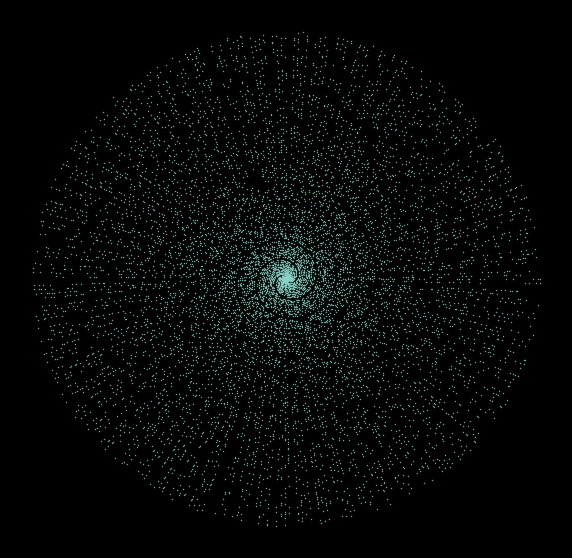

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def mainprog():
    
    
    N = 100000
    
    primes = factors(N)
    
    x,y = coordinates(primes)
    
    fig = plt.figure(figsize=(10,10))
    plt.axis("off")
    plt.style.use('dark_background')
    plt.scatter(x,y,s=0.15)
    
    plt.show()

        
        
        
def factors(N):
    
    primes = [2]
    it = 3 
    
    while it <= N:
        for prime in primes:
            if (it % prime == 0):
                break 
            elif (prime > np.sqrt(it)):
                primes.append(it)
                break
        it = it+1
    
    return primes    
    
    
def coordinates(num):
    
    x = num*np.cos(num)
    y = num*np.sin(num)
    
    return (x,y)


if __name__=="__main__":
    mainprog()





**Aside over**

Is there an underlying mathematical structure to this pattern? How can primes help us understand other branches of science? What does it all mean? Heaps of research are being done to study primes.

Rather than going deeper into the analysis, let us mearly ponder at its beauty for now. Ain't it cool?

**Exercise 2.13: Recursion**

Write recursion code that uses Catalan numbers and find the GCD

In [7]:
import numpy as np

def catalan(n):
    if (n == 0):
        #ans = 1
        
        return 1
    else:
        #ans = (4*n - 2)/(n+2) * catalan(n-1)
        
        return ((4*n - 2)/(n+1))*catalan(n-1)
      

def gcd(m,n):
    if (n == 0):
        return m
    else:
        return gcd(n,m%n)
        
        
n = 100

print(f"the {n}th Catalan number is {catalan(n)}")


m = 108
n = 192

print(f"the gcd between {m} and {n} is {gcd(m,n)}")


    

the 100th Catalan number is 8.965199470901317e+56
the gcd between 108 and 192 is 12
